In [1]:
from cdsaxs_fitting.fitter import Fitter
from cdsaxs_fitting.simulations.stacked_trapezoid import StackedTrapezoidSimulation
import numpy as np
import corner

### How to do a diffraction simulation using cdsaxs package?

#### Prepare the data

In [2]:
pitch = 100 #nm distance between two trapezoidal bars
qzs = np.linspace(-0.1, 0.1, 10)
qxs = 2 * np.pi / pitch * np.ones_like(qzs)

# Define initial parameters and multiples

#Initial parameters
dwx = 0.1
dwz = 0.1
i0 = 10
bkg = 0.1
y1 = 0.
height = [20.]
bot_cd = 40.
swa = [90.]

langle = np.deg2rad(np.asarray(swa))
rangle = np.deg2rad(np.asarray(swa))

#simulation data
i_params = {'heights': np.asarray(height),
            'langles': langle,
            'rangles': rangle,
            'y1': y1,
            'bot_cd': bot_cd,
            'dwx': dwx,
            'dwz': dwz,
            'i0': i0,
            'bkg_cste': bkg
            }

#### Create instance of the Simulation class and call right method

In [3]:
Simulation1 = StackedTrapezoidSimulation(qys=qxs, qzs=qzs)

intensity = Simulation1.simulate_diffraction(params=i_params)

## How to fit the data using cdsaxs package?

#### Prepare the data

In [4]:
initial_params = {'heights': {'value': height, 'variation': 10E-5},
                    'langles': {'value': langle, 'variation': 10E-5},
                    'rangles': {'value': rangle, 'variation': 10E-5},
                    'y1': {'value': y1, 'variation': 10E-5},
                    'bot_cd': {'value': bot_cd, 'variation': 10E-5},
                    'dwx': {'value': dwx, 'variation': 10E-5},
                    'dwz': {'value': dwz, 'variation': 10E-5},
                    'i0': {'value': i0, 'variation': 10E-5},
                    'bkg_cste': {'value': bkg, 'variation': 10E-5}
                    }

#### First create an instance of the Simulation class and pass it to the Fitter class along with data to fit

In [5]:
Simulation2 = StackedTrapezoidSimulation(use_gpu=False, qys=qxs, qzs=qzs, initial_guess=initial_params)

Fitter1 = Fitter(Simulation=Simulation2, exp_data=intensity)

#### Then call the fit method of the Fitter class that you want

In [6]:
cmaes = Fitter1.cmaes(sigma=100, ngen=10, popsize=10, mu=10, n_default=9, restarts=10, tolhistfun=10E-5, ftarget=10, restart_from_best=True, verbose=False)
mcmc = Fitter1.mcmc(N=9, sigma = np.asarray([100] * 9), nsteps=100, nwalkers=100, dir_save='./')


  0%|          | 0/100 [00:00<?, ?it/s]

/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [00:00<00:00, 1036.22it/s]


Saved to ./test.csv


You can plot the correlation in a corner plot in the following way:

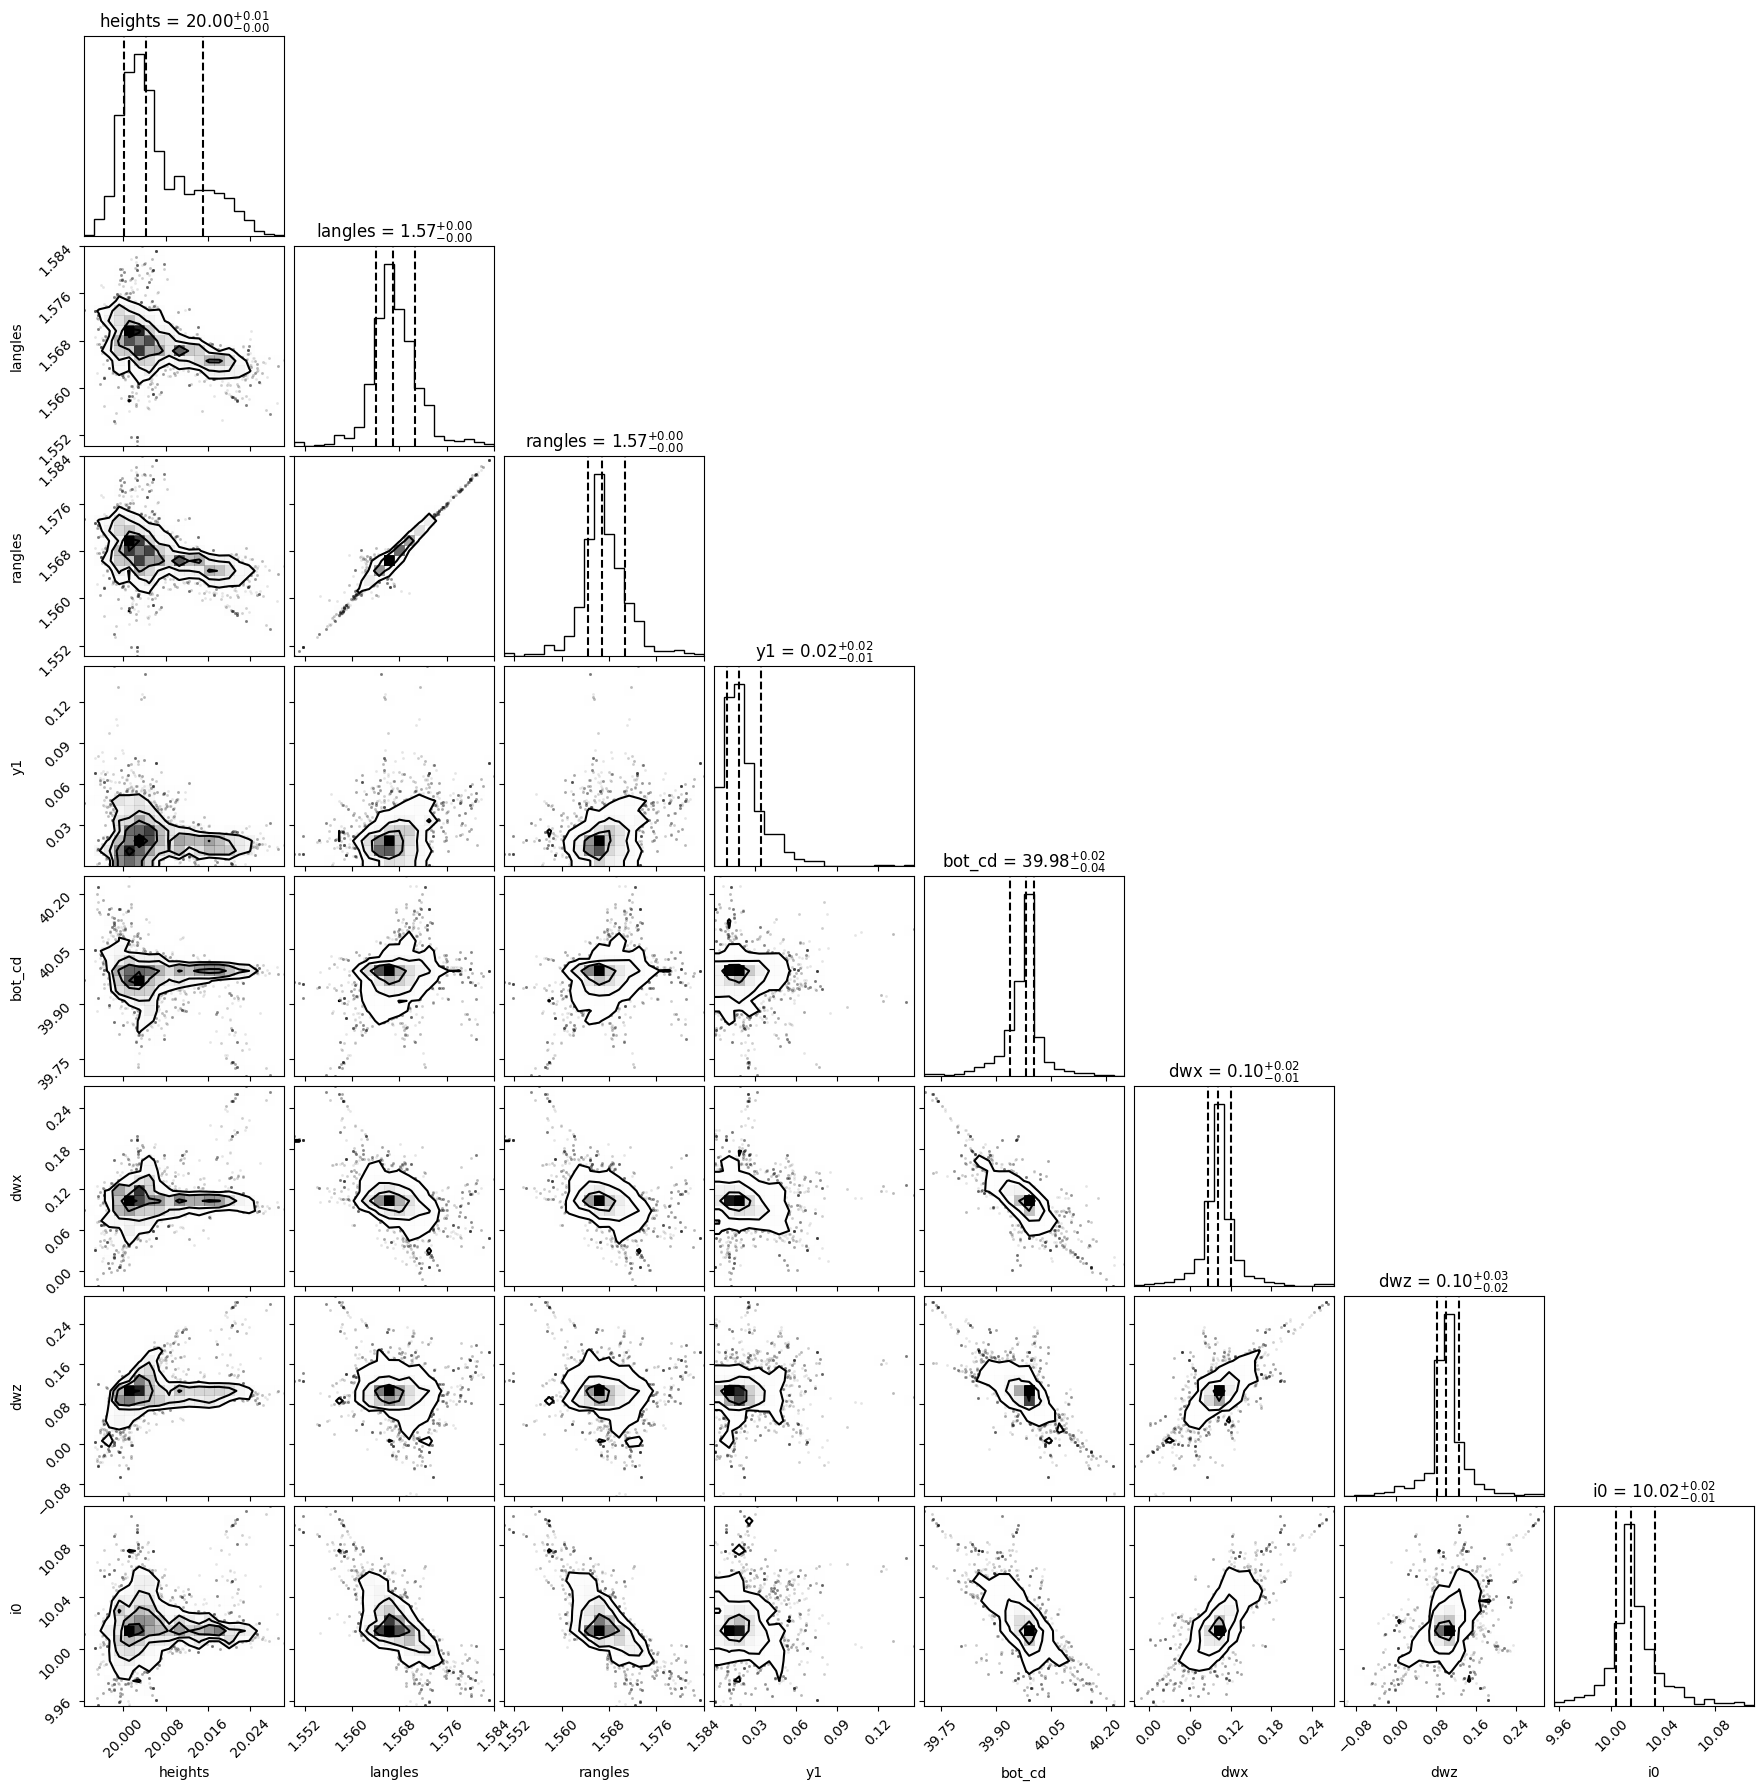

In [7]:
title = ['heights', 'langles', 'rangles', 'y1', 'bot_cd', 'dwx', 'dwz', 'i0', 'bkg_cste']
Fitter1.plot_correlation(file='./poparr.csv', title=title, N=9)